# Countries statistics

### Analysis of internet usage, GDP per capita, and new businesses counts.

---

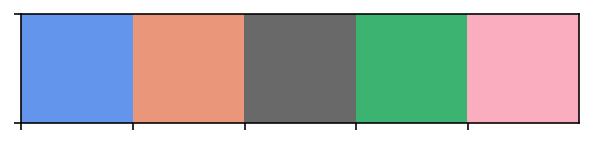

In [1]:
%config InlineBackend.matplotlib='inline'
%config InlineBackend.figure_format='retina'
%config InlineBackend.ast_node_interactivity='all'


import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import matplotlib as mpl;

# setting custom color_palette
ui_flat = ["#6495ED","#E9967A", "#696969", "#3CB371", "#f9adbe"]
sns.set_palette(ui_flat)
sns.palplot(sns.color_palette()); 

---

Below code threw `ParserError: Error tokenizing data. C error: Expected 4 fields in line 4675, saw 6`.
Opened .csv to look and it seems the last few hundred rows were descriptors or footnotes.
Used `nrows=` args to select proper data set format.



Solved problems 11 and 12 by using `usecols=` and `names=` args during `.read_csv()`

After loading our `.csv`s, we'll run quick inspection of both `DataFrame`s.

In [2]:
gdp_df = pd.read_csv('.//data//gdp_per_capita.csv', 
                        nrows=6499, 
                        names=['Country', 'Year','GDP_Per_Capita', 'Value'],
                        usecols=['Country', 'Year','GDP_Per_Capita'],  
                        skiprows=1)

internet_df = pd.read_csv('.//data//internet_use.csv', 
                        nrows=4494, 
                        names=['Country', 'Year','Internet_Users_Pct', 'Value'], 
                        usecols=['Country', 'Year','Internet_Users_Pct'], 
                        skiprows=1)

new_bus_count = pd.read_csv('.//data//new_businesses_numbers.csv', 
                        names=["Country","Year","New_Businesses","Value Footnotes"],
                        usecols=["Country","Year","New_Businesses"],
                        skiprows=1)

gdp_ppp_df = pd.read_csv('.//data//gdp_ppp.csv', 
                        nrows=6497, 
                        names=['Country', 'Year','GDP_PPP', 'Value Footnotes'],
                        usecols=['Country', 'Year','GDP_PPP'],  
                        skiprows=1) # for last analysis

print(gdp_df.shape)
print(internet_df.shape)
print(new_bus_count.shape)
print(gdp_df.columns)
print(internet_df.columns)
print(new_bus_count.columns)

(6499, 3)
(4494, 3)
(1334, 3)
Index(['Country', 'Year', 'GDP_Per_Capita'], dtype='object')
Index(['Country', 'Year', 'Internet_Users_Pct'], dtype='object')
Index(['Country', 'Year', 'New_Businesses'], dtype='object')


---

Below we'll merge `gdp_df`, `internet_df`, `new_bus_count`, and inspect the merged set. All `DataFrames` have `Country` and `Year` columns in common. Using `how='inner'` to combine data.

In [3]:
gdp_internet = pd.merge(gdp_df, 
                        internet_df,
                        on=['Country','Year'], 
                        how='inner')
gdp_int_bus = pd.merge(gdp_internet,
                        new_bus_count,
                        on=['Country', 'Year'],
                        how='inner')
gdp_int_bus.head(3)
gdp_int_bus.tail(3)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,New_Businesses
0,Afghanistan,2014,1795.735834,6.390000,3422
1,Afghanistan,2013,1807.762344,5.900000,4638
2,Afghanistan,2012,1772.764974,5.454545,20817


,Country,Year,GDP_Per_Capita,Internet_Users_Pct,New_Businesses
994,Zambia,2008,2934.293043,5.550000,6278
995,Zambia,2007,2797.889591,4.870000,5072
996,Zambia,2006,2652.092728,4.159913,3402


---

Creating three `df`'s by years 04' 09' 14' from `gdp_internet`. Concatenating all three for later plotting.

In [4]:
df_2004 = gdp_internet[gdp_internet['Year'] == 2004]
df_2009 = gdp_internet[gdp_internet['Year'] == 2009]
df_2014 = gdp_internet[gdp_internet['Year'] == 2014]
df_04_09_14 = pd.concat([df_2004, df_2009, df_2014])

---

Countries with highest internet use percentage for years 04' 05' 06'.

In [5]:
max_internet_pct_2004 = df_2004.nlargest(1, 'Internet_Users_Pct')
max_internet_pct_2009 = df_2009.nlargest(1, 'Internet_Users_Pct')
max_internet_pct_2014 = df_2014.nlargest(1, 'Internet_Users_Pct')

print('Highest country internet use by year:')
print(f"2004: {max_internet_pct_2004.Country.item()}")
print(f"2009: {max_internet_pct_2009.Country.item()}")
print(f"2014: {max_internet_pct_2014.Country.item()}")

Highest country internet use by year:
2004: Sweden
2009: Iceland
2014: Iceland


---

Countries with lowest internet use for years 04' 05' 06'.

In [6]:
min_internet_pct_2004 = df_2004.nsmallest(1, 'Internet_Users_Pct')
min_internet_pct_2009 = df_2009.nsmallest(1, 'Internet_Users_Pct')
min_internet_pct_2014 = df_2014.nsmallest(1, 'Internet_Users_Pct')

print('Lowest country internet use by year:')
print(f"2004: {min_internet_pct_2004.Country.item()}")
print(f"2009: {min_internet_pct_2009.Country.item()}")
print(f"2014: {min_internet_pct_2014.Country.item()}")

Lowest country internet use by year:
2004: Myanmar
2009: Timor-Leste
2014: Timor-Leste


---

Highest and lowest GDP per capita countries in 2014.

In [7]:
df_2014.nsmallest(1, 'GDP_Per_Capita')
df_2014.nlargest(1, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1983,Mauritania,2014,377.908916,10.7


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2556,Qatar,2014,116693.507701,91.49


---
### Country GDP and internet usage distributions

Plotting of `Year` with x-axis as `GDP_Per_Capita` and y-axis as `Internet_Users_Pct`.

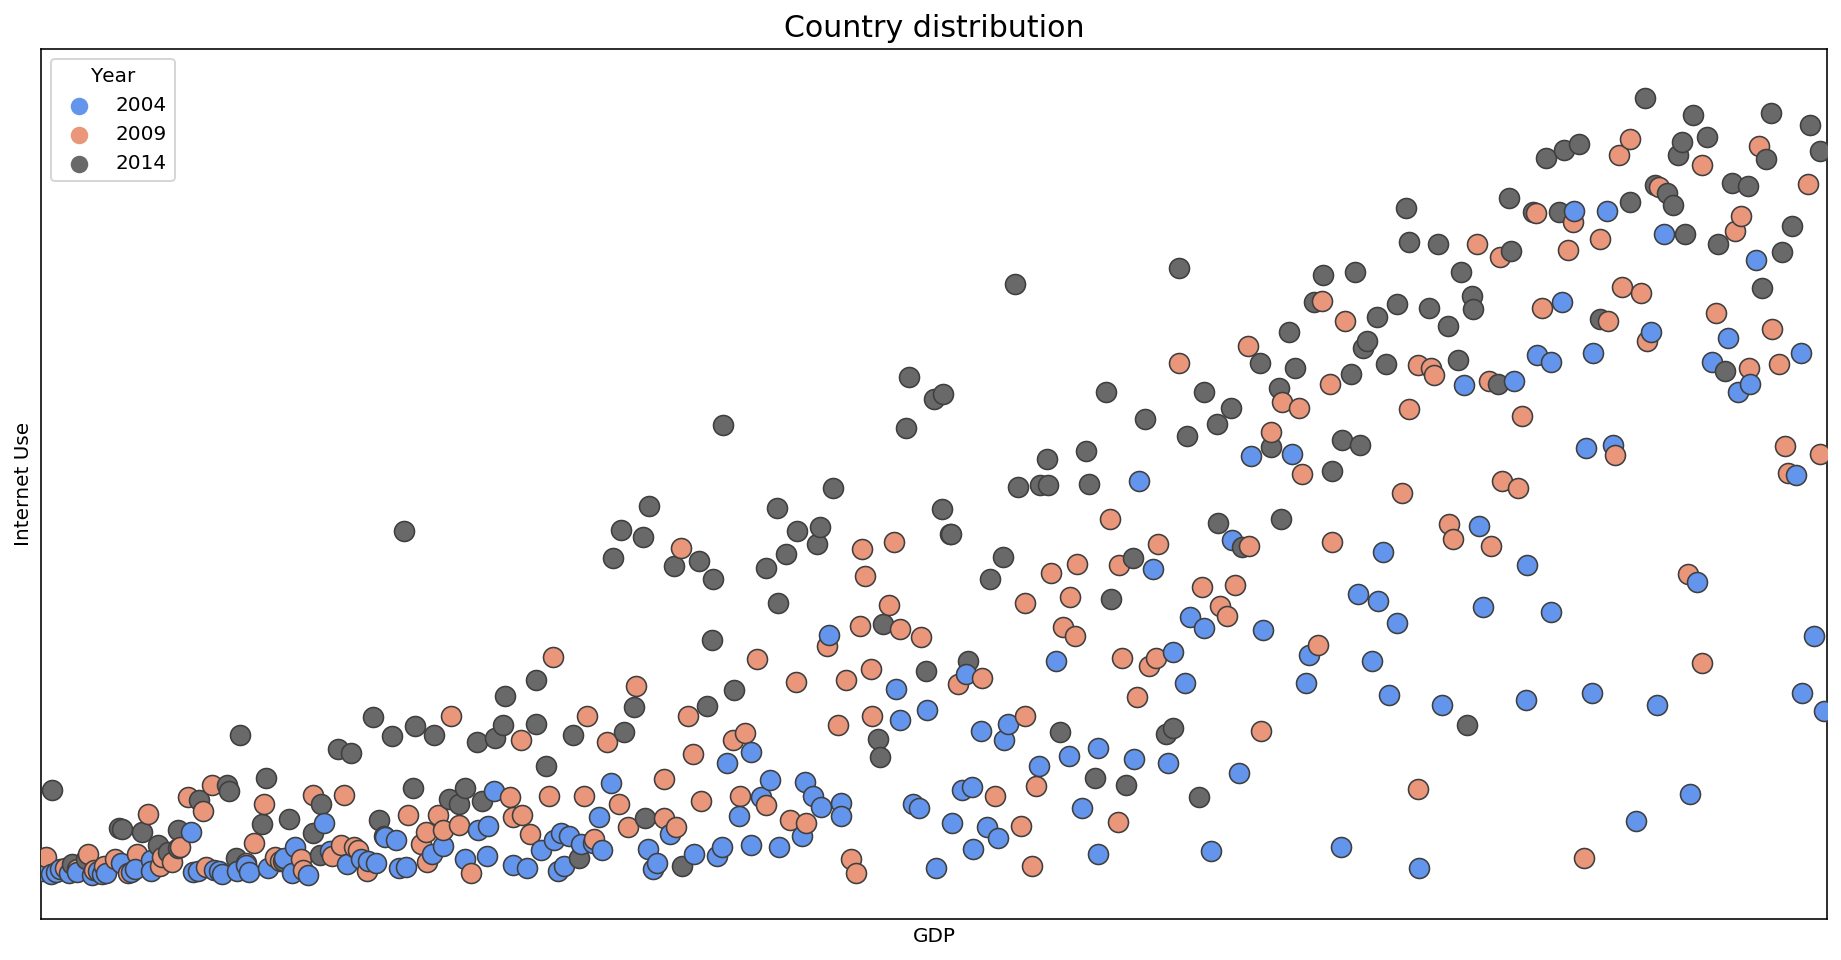

In [8]:
plt.figure(figsize=(16,8), clear=True);

ax1 = sns.stripplot(x="GDP_Per_Capita", 
                    y="Internet_Users_Pct", 
                    data=df_04_09_14,
                    jitter=2, 
                    hue="Year", 
                    size=10,
                    linewidth=.8,
                    dodge=True);
ax1.set_xlabel('GDP');
ax1.set_ylabel('Internet Use');
ax1.set_yticks([]);
ax1.set_xticks([]);
ax1.axes.set_title('Country distribution', fontsize=15);

Observing the plot `ax1` above, we notice that in general, there looks to be a positive correlation between GDP and internet usage. This correlation seems strongest in years 2009 and 2014.

---

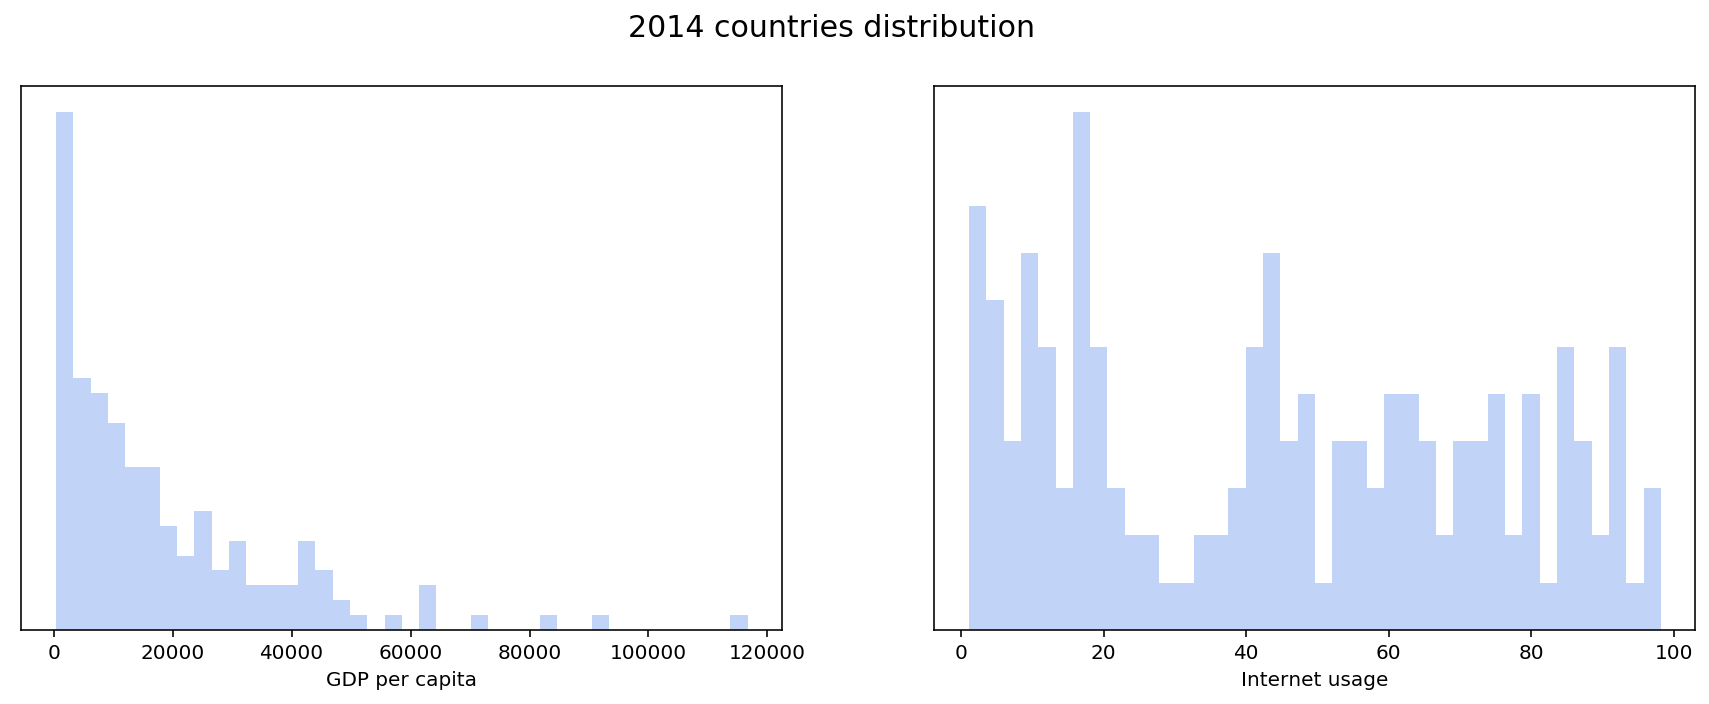

In [9]:
fig, (gdp, internet) = plt.subplots(ncols=2); # creates figure and set of 2 subplots

ax2 = sns.distplot(df_2014.GDP_Per_Capita, 
                   bins=40, 
                   ax=gdp, 
                   kde=False,
                   axlabel='GDP per capita'); 
ax3 = sns.distplot(df_2014.Internet_Users_Pct, 
                   bins=40,
                   ax=internet, 
                   kde=False,
                   axlabel='Internet usage');
fig.suptitle("2014 countries distribution", size=15)
ax2.set_yticks([])
ax3.set_yticks([])
fig.set_figwidth(15);
fig.set_figheight(5);

Charts `ax2` and `ax3` are for visualization of `GDP_Per_Capita` and `Internet_Users_Pct` to determine if there are unimodalities in the distributions. 

- GDP per capita has a unimodal distribution
- Internet users per capita seem to have a multimodal distribution

---
### Top 5 coutries using the internet in 04' 05' 14'

For this we'll slice the top 5 internet using countries using `.head()` from years 04', 09, 14', concatenate them into one `DataFrame`, and `.count()` to make sure we have a total of 15 rows countries total.

In [10]:
top_5_internet_2014 = df_2014.nlargest(5, 'Internet_Users_Pct')
top_5_internet_2009 = df_2009.nlargest(5, 'Internet_Users_Pct')
top_5_internet_2004 = df_2004.nlargest(5, 'Internet_Users_Pct')

top_5_internet_all = pd.concat([top_5_internet_2004, top_5_internet_2009, top_5_internet_2014])
top_5_internet_all.count()

Country               15
Year                  15
GDP_Per_Capita        15
Internet_Users_Pct    15
dtype: int64

---
### 2014 Top 5 internet using countries trends

Next we'll filter rows we need from the main df `gdp_internet` using the top 5 internet use countries of year 2014 and graph their internet percent trends from 2004 onward(chart `ax4`). 

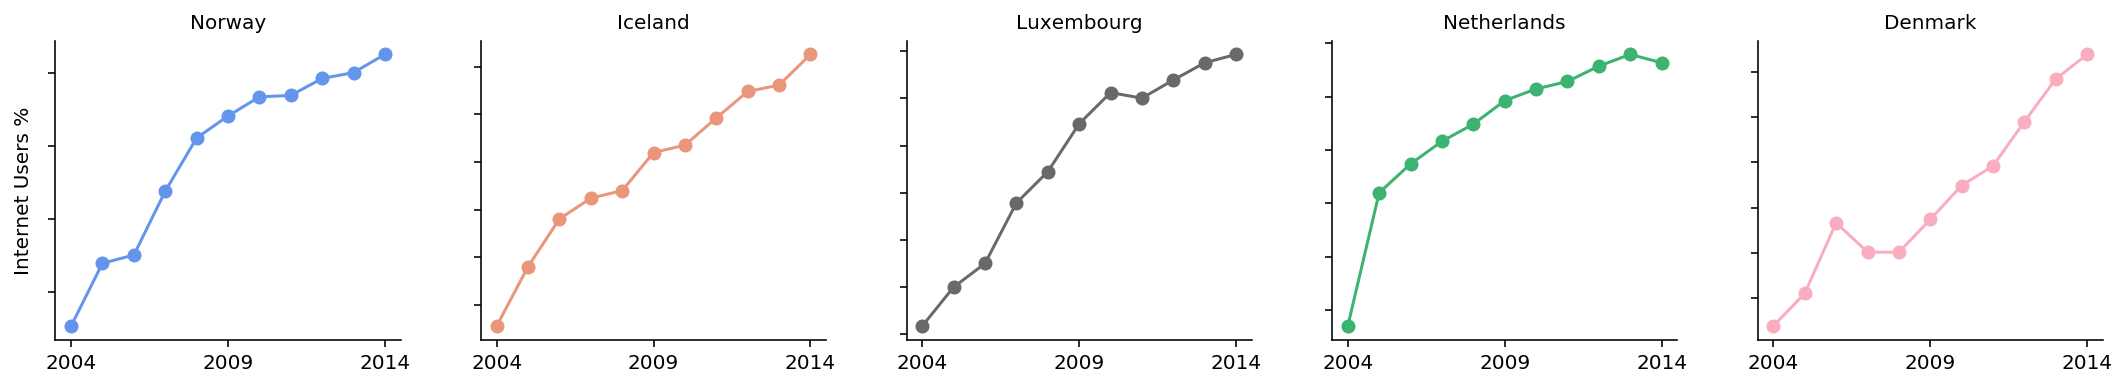

In [11]:
top_5_internet_filtered = gdp_internet[(gdp_internet['Country'].isin(top_5_internet_2014.Country.values)) &
                                 (gdp_internet['Year'] >= 2004)].sort_values('Year');

top_5_internet_2004 = (top_5_internet_filtered[top_5_internet_filtered.Country.isin(top_5_internet_2014.Country.values)].head());

# facet-grid
ax4 = sns.FacetGrid(top_5_internet_filtered, 
                    col="Country",
                    height=3,
                    hue="Country",
                    sharey=False,
                    sharex=False);
ax4 = ax4.map(plt.plot, 
                    "Year", 
                    "Internet_Users_Pct", 
                    marker="o").set(xticks=[2004, 2009, 2014],
                                    xlabel='');
ax4.set_yticklabels([]);
ax4.set_titles('{col_name}');
ax4.set_ylabels('Internet Users %');

---

### 2014 Bottom 5 internet using countries analysis

For this problem we'll use the same filtering techniques as above to plot figure `ax5` next.

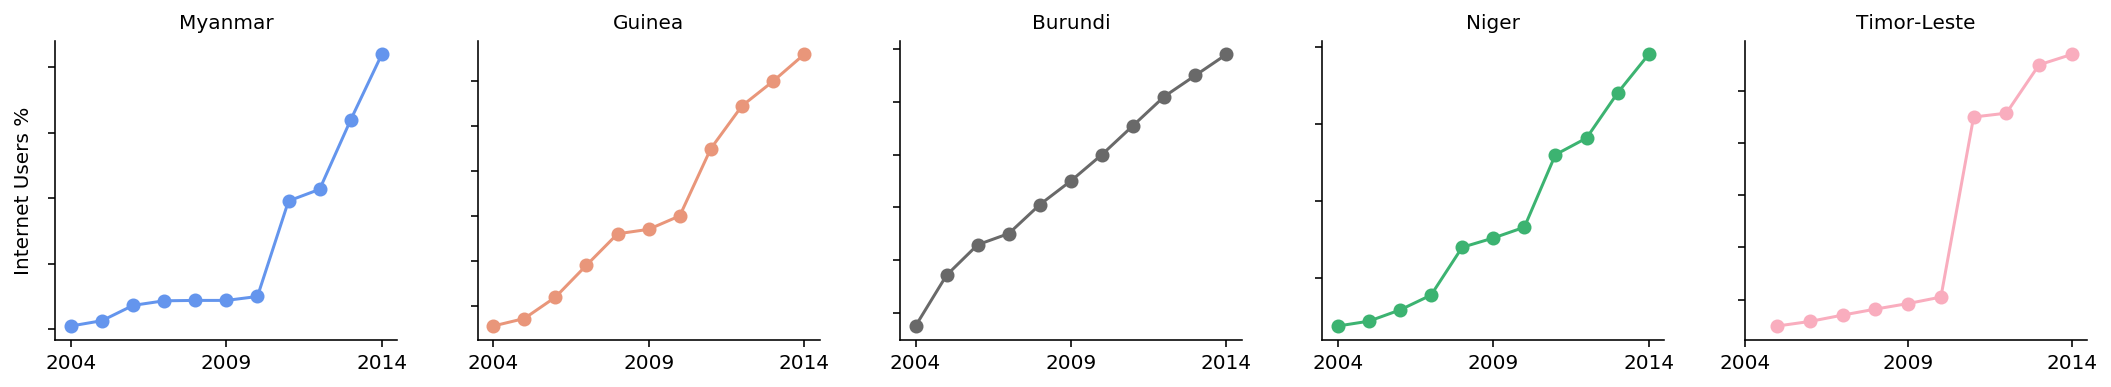

In [12]:
bot_5_internet_2004 = df_2004.nsmallest(5, 'Internet_Users_Pct')
bot_5_internet_2009 = df_2009.nsmallest(5, 'Internet_Users_Pct')
bot_5_internet_2014 = df_2014.nsmallest(5, 'Internet_Users_Pct')
bot_5_internet_all = pd.concat([bot_5_internet_2004, bot_5_internet_2009, bot_5_internet_2014])

bot_5_internet_filtered = gdp_internet[(gdp_internet['Country'].isin(bot_5_internet_2014.Country.values)) &
                                 (gdp_internet['Year'] >= 2004)].sort_values('Year')
# facet-grid 
ax5 = sns.FacetGrid(bot_5_internet_filtered, 
                    col="Country",
                    height=3,
                    hue="Country",
                    sharey=False,
                    sharex=False);
ax5 = ax5.map(plt.plot, 
                    "Year", 
                    "Internet_Users_Pct", 
                    marker="o").set(xticks=[2004, 2009, 2014],
                                    xlabel='');
ax5.set_yticklabels([]);
ax5.set_titles('{col_name}');
ax5.set_ylabels('Internet Users %');

---
## Bottom and top countries with greatest change of internet use from 2004 - 2014.

It's nice to have visualizations, but lets calculate the percentage change with simple selection and subtraction. For this we'll have to double check wether these 5 2014 countries have 2004 records.
- For bottom countries(`bot_internet_2004`): Timor-Leste for 2004 not in `bot_5_internet_filtered` because there is no record for that year. Using 2005 row instead.
- For both top and bottom use `.nlargest()` to get the countries with the largest change in internet use.

In [13]:
# compare largest change in internet use of bottom use countries
bot_internet_2004 = bot_5_internet_filtered[bot_5_internet_filtered['Year'] == 2004].append(bot_5_internet_filtered.iloc[4, :])
bot_internet_2014 = bot_5_internet_filtered[bot_5_internet_filtered['Year'] == 2014]

bot_internet_2004['Internet_Use_Change'] = (bot_internet_2014['Internet_Users_Pct'].values - 
                                            bot_internet_2004["Internet_Users_Pct"].values)
bot_internet_2004.nlargest(1, 'Internet_Use_Change')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Internet_Use_Change
2280,Niger,2004,757.751262,0.189934,1.760066


In [14]:
# compare largest change in internet use of top use countries
top_5_internet_2004.sort_values('Country', inplace=True)
top_5_internet_2014.sort_values('Country', inplace=True)

top_5_internet_2004['Internet_Use_Change'] = (top_5_internet_2014['Internet_Users_Pct'].values - 
                                              top_5_internet_2004['Internet_Users_Pct'].values)
top_5_internet_2004.nlargest(1, 'Internet_Use_Change')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Internet_Use_Change
1822,Luxembourg,2004,87209.819398,65.88,28.79


---

## 2014 Bottom 5 GDP countries trends analysis

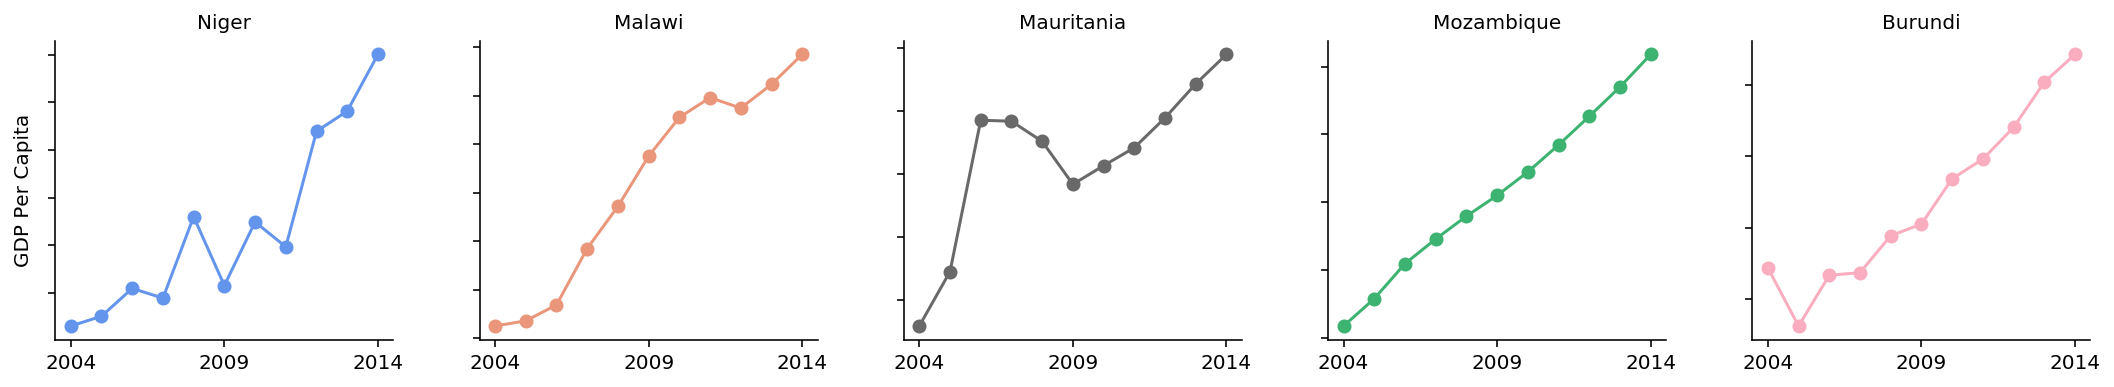

In [15]:
bot_5_gdp_filtered = gdp_internet[(gdp_internet['Country'].isin(df_2014.nsmallest(5, 'GDP_Per_Capita').Country.values)) &
                                 (gdp_internet['Year'] >= 2004)].sort_values('Year')

ax6 = sns.FacetGrid(bot_5_gdp_filtered, 
                    col="Country",
                    height=3,
                    hue="Country",
                    sharey=False,
                    sharex=False);
ax6 = ax6.map(plt.plot,
                    "Year", 
                    "GDP_Per_Capita",
                    marker="o").set(xticks=[2004, 2009, 2014], 
                                    xlabel='');
ax6.set_yticklabels([]);
ax6.set_titles('{col_name}');
ax6.set_ylabels('GDP Per Capita');

---

## 2014 Top 5 GDP countries trends analysis

Below we'll analyze countries with the highest GDP taken rom 2014. Alongside this, we'll use the merged df we created earlier(`gdp_int_bus`) to look at `New_Businesses` counts registered within these countries as well.(Notice `Kuwait` is void of `New_Businesses` observations).

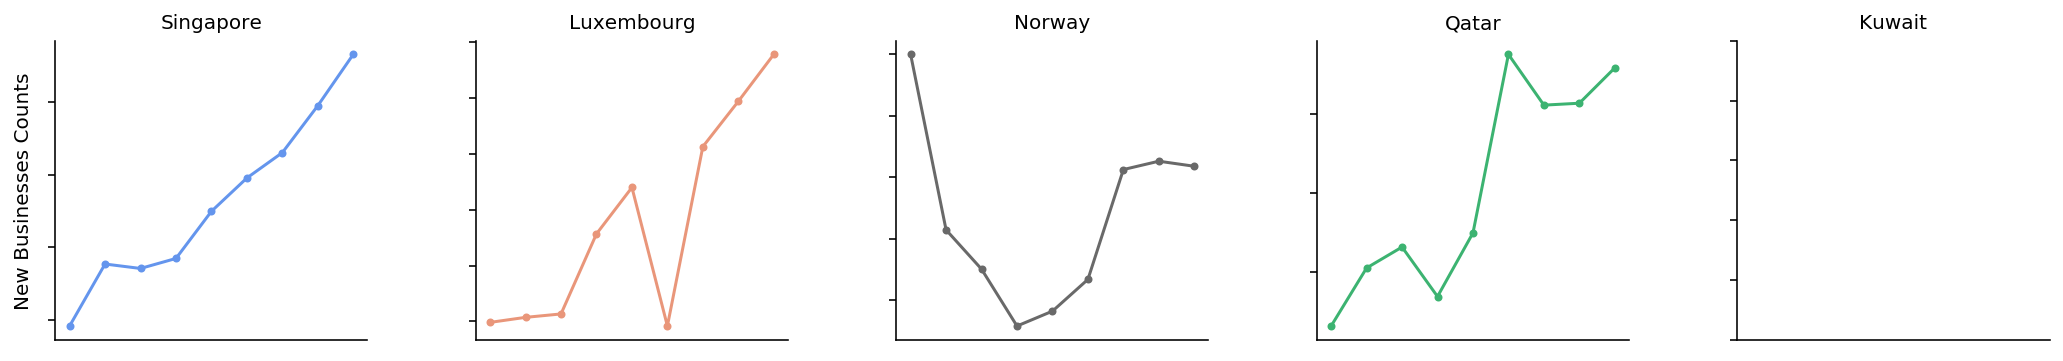

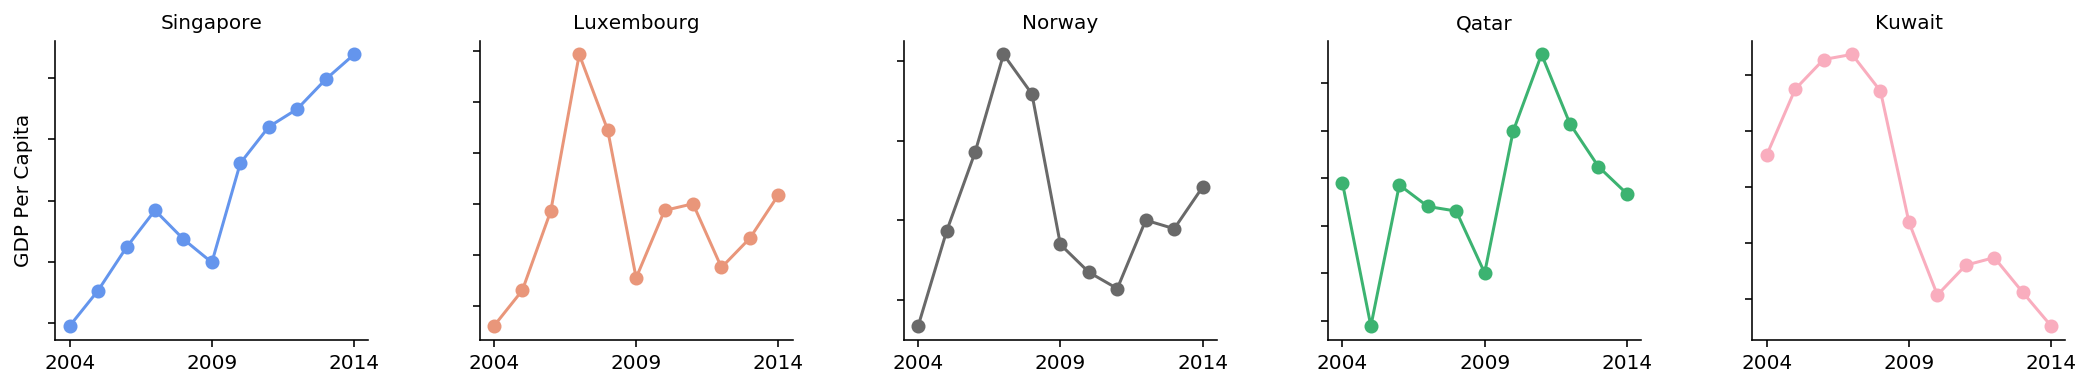

In [16]:
filtered_top_5_bus_2014 = gdp_int_bus[(gdp_int_bus['Country'].isin(list(df_2014.nlargest(5, 'GDP_Per_Capita').Country.values))) &
                                 (gdp_int_bus['Year'] >= 2004)];

top_5_gdp_filtered = gdp_internet[(gdp_internet['Country'].isin(df_2014.nlargest(5, 'GDP_Per_Capita').Country.values)) &
                                 (gdp_internet['Year'] >= 2004)].sort_values('Year');
# by business count facet-grid
ax7 = sns.FacetGrid(filtered_top_5_bus_2014, 
                    col="Country",
                    height=3,
                    hue="Country",
                    sharey=False,
                    sharex=False,
                    hue_order=['Singapore', 'Luxembourg', 'Norway', 'Qatar'],
                    col_order=['Singapore', 'Luxembourg', 'Norway', 'Qatar', 'Kuwait']);
ax7 = ax7.map(plt.plot,
                    "Year", 
                    "New_Businesses",
                    marker=".").set(xticks=[],
                                    xlabel='');
# by gdp facet-grid
ax8 = sns.FacetGrid(top_5_gdp_filtered, 
                    col="Country",
                    height=3,
                    hue="Country",
                    sharey=False,
                    sharex=False);

ax8 = ax8.map(plt.plot,
                    "Year", 
                    "GDP_Per_Capita",
                    marker="o").set(xticks=[2004, 2009, 2014], 
                                    xlabel='');
ax7.set_yticklabels([]);
ax7.set_titles('{col_name}');
ax7.set_ylabels('New Businesses Counts');
ax8.set_yticklabels([]);
ax8.set_titles('{col_name}');
ax8.set_ylabels('GDP Per Capita');

Top facet-grid(`ax7`) new businesses counts.

Looking at the bottom facet-grid, all 5 of the top `GDP Per Capita` countries took a hit in 2007. An interesting observation we can see is the rate at which Singapore recovered(1 year recovery!) and kept adding value to its GDP as compared to the other 4 countries.

Below are some facts about Singapore:

- The economy of Singapore is a highly developed free-market economy(economic system in which the decisions regarding investment, production and distribution are guided by the price signals created by the forces of supply and demand).
- Singapore's economy has been ranked as the most open in the world.
- 3rd least corrupt.
- Most pro-business with low tax rates.
- [source](https://en.wikipedia.org/wiki/Economy_of_Singapore)

---

As an extra aside, let us compare effects of 2007/2008 recession on top GDP PPP countries in Europe and East Asia as of today:
- Set one: figure `ax10` East [Asia's big 4](https://en.wikipedia.org/wiki/List_of_Asian_and_Pacific_countries_by_GDP_(PPP)):
> China, Japan, Korea(no individual South, North data), Hong Kong SAR(next on list, no Taiwan data)

- Set two: figure `ax11` [Europe's big 4](https://en.wikipedia.org/wiki/List_of_sovereign_states_in_Europe_by_GDP_(PPP)_per_capita):
>Luxembourg, Ireland, Norway, Switzerland

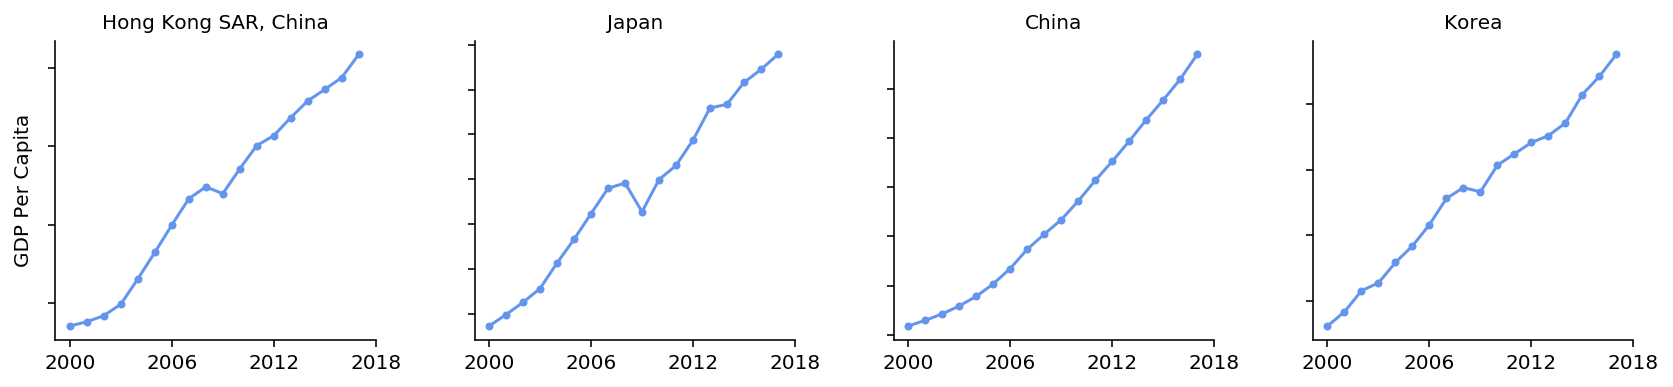

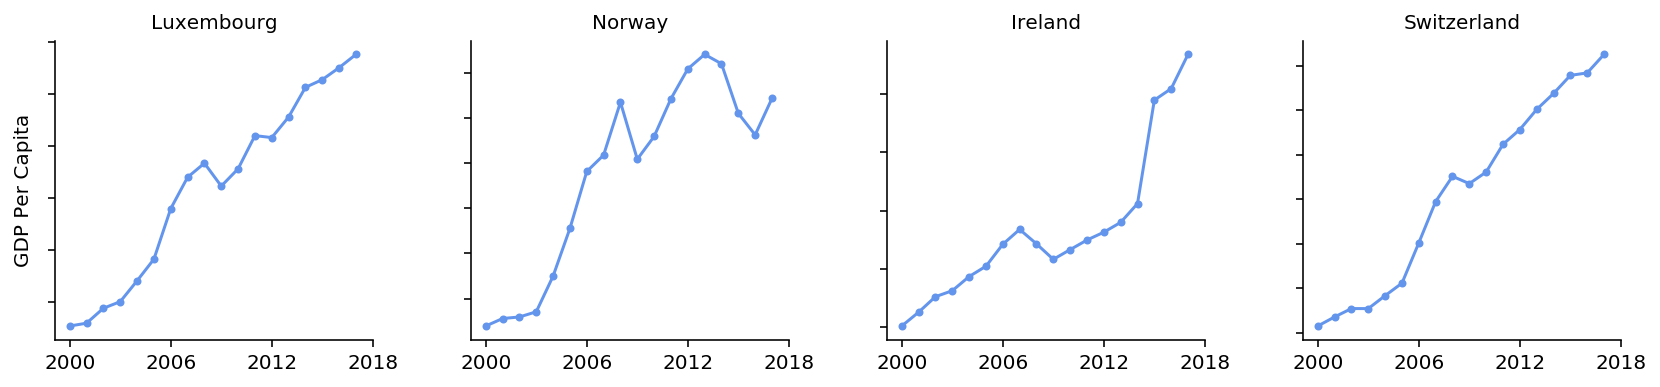

In [17]:
four_dragons = ["Hong Kong SAR, China", 'Japan', 'Korea', 'China']
four_eu = ['Luxembourg', 'Ireland', 'Norway', 'Switzerland']

four_dragons_filtered = gdp_ppp_df[(gdp_ppp_df['Country'].isin(four_dragons)) &
                                 (gdp_ppp_df['Year'] >= 2000)].sort_values('Year');

four_eu_filtered = gdp_ppp_df[(gdp_ppp_df['Country'].isin(four_eu)) &
                                 (gdp_ppp_df['Year'] >= 2000)].sort_values('Year');

# asian 4
ax10 = sns.FacetGrid(four_dragons_filtered, 
                    col="Country",
                    height=3,
                    sharey=False,
                    sharex=False);
ax10 = ax10.map(plt.plot,
                    "Year", 
                    "GDP_PPP",
                    marker=".").set(xticks=[2000, 2006, 2012, 2018], 
                                    xlabel='');
# europe 4
ax11 = sns.FacetGrid(four_eu_filtered, 
                    col="Country",
                    height=3,
                    sharey=False,
                    sharex=False,);
ax11 = ax11.map(plt.plot,
                    "Year", 
                    "GDP_PPP",
                    marker=".").set(xticks=[2000, 2006, 2012, 2018], 
                                    xlabel='');
ax11.set_yticklabels([]);
ax11.set_titles('{col_name}');
ax11.set_ylabels('GDP Per Capita');
ax10.set_yticklabels([]);
ax10.set_titles('{col_name}');
ax10.set_ylabels('GDP Per Capita');

Upon inspection, all countries take a dip in GDP per capita besides china. 

Authors Yi Wen and Jing Wu are academics at Tsinghua University, and their research suggests that the huge stimulus package put in place by the Chinese government in 2008 was a huge factor in why China suffered very little from the Great Recession of 2008-2009:

“The Great Recession was characterized by two related phenomena: (i) a jobless recovery and (ii) a permanent drop in aggregate output. Data show that the United States, Europe, and even countries with lesser ties to the international financial system have suffered large permanent losses in aggregate output and employment since the financial crisis, despite unprecedented monetary injections. However, the symptoms of the Great Recession were not observed in China, despite a 45% permanent drop in its exports one of the largest trade collapses in world history since the Great Depression. Our empirical analysis shows that China is success in escaping the Great Recession is attributable to its bold and powerful 4 trillion renminbi stimulus package launched in late 2008.”

[source](https://www.valuewalk.com/2014/03/great-recession-minimal-impact-china/)